# 1 import package and data

In [1]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from joblib import dump, load
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from IPython import display
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
features = np.load(r'/content/drive/MyDrive/Colab Notebooks/features.npy', allow_pickle=True)
label = np.load(r'/content/drive/MyDrive/Colab Notebooks/label.npy', allow_pickle=True)
scaler = MinMaxScaler()
features = scaler.fit_transform(features)
label = np.log10(label)
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=44)


# 2.model

## 2.1 dt

In [ ]:
depth = 4
dt = DecisionTreeRegressor(max_depth=depth)
dt.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
train_accuracy = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_r2 = r2_score(y_train, y_pred_train)
test_accuracy = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)
print(f'Training_loss:{train_accuracy}\ntest_loss:{test_accuracy}\ntrain_r2:{train_r2}\ntest_R2:{test_r2}')

## 2.2 mlp




In [ ]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import TensorDataset
from torch.utils.data import random_split
import torch.optim as optim
from torch.utils import data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
import torch.nn.functional as F
%matplotlib inline

In [ ]:
dataset = TensorDataset(features, label)
train_dataset, test_dataset = random_split(dataset, [42, 10])

In [ ]:
y_train_tensor = y_train.flatten()
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train_tensor).float().reshape(41,1)
y_test_tensor = y_test.flatten()
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test_tensor).float().reshape(11,1)
train_tensor = TensorDataset(X_train_tensor,  y_train_tensor)
test_tensor = TensorDataset(X_test_tensor, y_test_tensor)
train_iter = data.DataLoader(train_tensor, batch_size=41, shuffle=True)
test_iter = data.DataLoader(test_tensor, batch_size=11, shuffle=True)

In [ ]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        weight_shape = m.weight.shape
        num_nonzero = int(0.1 * weight_shape[0])  
        indices = torch.randperm(weight_shape[0])[:num_nonzero]  
        m.weight.data[indices] = 0  
net = nn.Sequential(
           nn.ReLU(),
           nn.Linear(9,100),
           nn.ReLU(),
           nn.Linear(100,1)
                    )
net.apply(init_weights)
criterion = nn.MSELoss()
optimizer = optim.Adagrad(net.parameters(), lr=0.005)
train_mse = []
test_mse = []
test_r2 = []
train_r2=[]
x=[]
plt.figure()
num_epochs = 40
for epoch in range(num_epochs):
    net.train()
    for featuress, labelss in train_iter:
        optimizer.zero_grad()
        outputs = net(featuress)
        loss = criterion(outputs, labelss)
        loss.backward()
        optimizer.step()
    for features_test, labels_test in test_iter:
        out = net(features_test)
        loss_test = criterion(out, labels_test)
    train_mse.append(loss.detach().numpy().tolist())
    test_mse.append(loss_test.detach().numpy().tolist())
    test_r2.append(r2_score(labels_test.detach().numpy(), out.detach().numpy()))
    train_r2.append(r2_score(labelss, outputs.detach().numpy()))
    x.append(epoch+1)
    plt.clf()
    plt.plot(x,train_mse, color='blue', label='train_mse')
    plt.plot(x,test_mse, color='green', label='test_mse')
    plt.plot(x,test_r2, color='red', label='test_r2')
    plt.plot(x,train_r2, color='black', label='train_r2')
    plt.legend()
    plt.xlim(0, num_epochs+1)
    plt.ylim(-2, 2) 
    plt.xlabel('Epochs')  
    plt.ylabel('Loss')  
    display.clear_output(wait=True)
    plt.pause(0.01)

In [ ]:
torch.save(net, 'net_model3.pth')

## 2.3 sklearn network

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
hiden_1 = 500
hiden_2 = 70
para = 9 + 9*hiden_1 + hiden_1*hiden_2 + hiden_2
model = MLPRegressor(hidden_layer_sizes=(hiden_1, hiden_2), activation='relu', solver='adam', random_state=42)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print(f'para:{para}')
train_accuracy = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_r2 = r2_score(y_train, y_pred_train)
test_accuracy = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)
print(f'Training_loss:{train_accuracy} test_loss:{test_accuracy}\ntrain_r2:{train_r2} test_R2:{test_r2}')

para:39579
Training_loss:0.07451839804628536 test_loss:0.3465668408019024
train_r2:0.9600849328759047 test_R2:-0.45567248085107437


## 2.4 poly

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [ ]:
listp = [1,2,3,4,5,6]
for i in listp:
  model = make_pipeline(PolynomialFeatures(i), LinearRegression())
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  print(f'degree:{i}')
  train_accuracy = np.sqrt(mean_squared_error(y_train, y_pred_train))
  train_r2 = r2_score(y_train, y_pred_train)
  test_accuracy = np.sqrt(mean_squared_error(y_test, y_pred_test))
  test_r2 = r2_score(y_test, y_pred_test)
  print(f'Training_loss:{train_accuracy}\ntest_loss:{test_accuracy}\ntrain_r2:{train_r2}\ntest_R2:{test_r2}')

## 2.5 RF

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:

for i in range(5):
  i = i+2
  model = RandomForestRegressor(max_depth=i)
  # 训练模型
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  # 计算训练准确率
  print(f'degree:{i}')
  train_accuracy = np.sqrt(mean_squared_error(y_train, y_pred_train))
  train_r2 = r2_score(y_train, y_pred_train)
  test_accuracy = np.sqrt(mean_squared_error(y_test, y_pred_test))
  test_r2 = r2_score(y_test, y_pred_test)
  print(f'Training_loss:{train_accuracy}\ntest_loss:{test_accuracy}\ntrain_r2:{train_r2}\ntest_R2:{test_r2}')

degree:2
Training_loss:0.2528553265978783
test_loss:0.2984692814195182
train_r2:0.5404274746178475
test_R2:-0.07966478628954232
degree:3
Training_loss:0.20754715323582623
test_loss:0.26416407009526566
train_r2:0.6903697342822874
test_R2:0.15425945436712396
degree:4
Training_loss:0.1701229008214589
test_loss:0.2694167768241379
train_r2:0.7919654812599963
test_R2:0.1202912145691617
degree:5
Training_loss:0.14149461598795415
test_loss:0.29137922593090054
train_r2:0.8560904307045712
test_R2:-0.02897974836894579
degree:6
Training_loss:0.1401476348667573
test_loss:0.2670017393209799
train_r2:0.8588173303727045
test_R2:0.1359918524326189


# 3 XGboost

## 3.1 data description

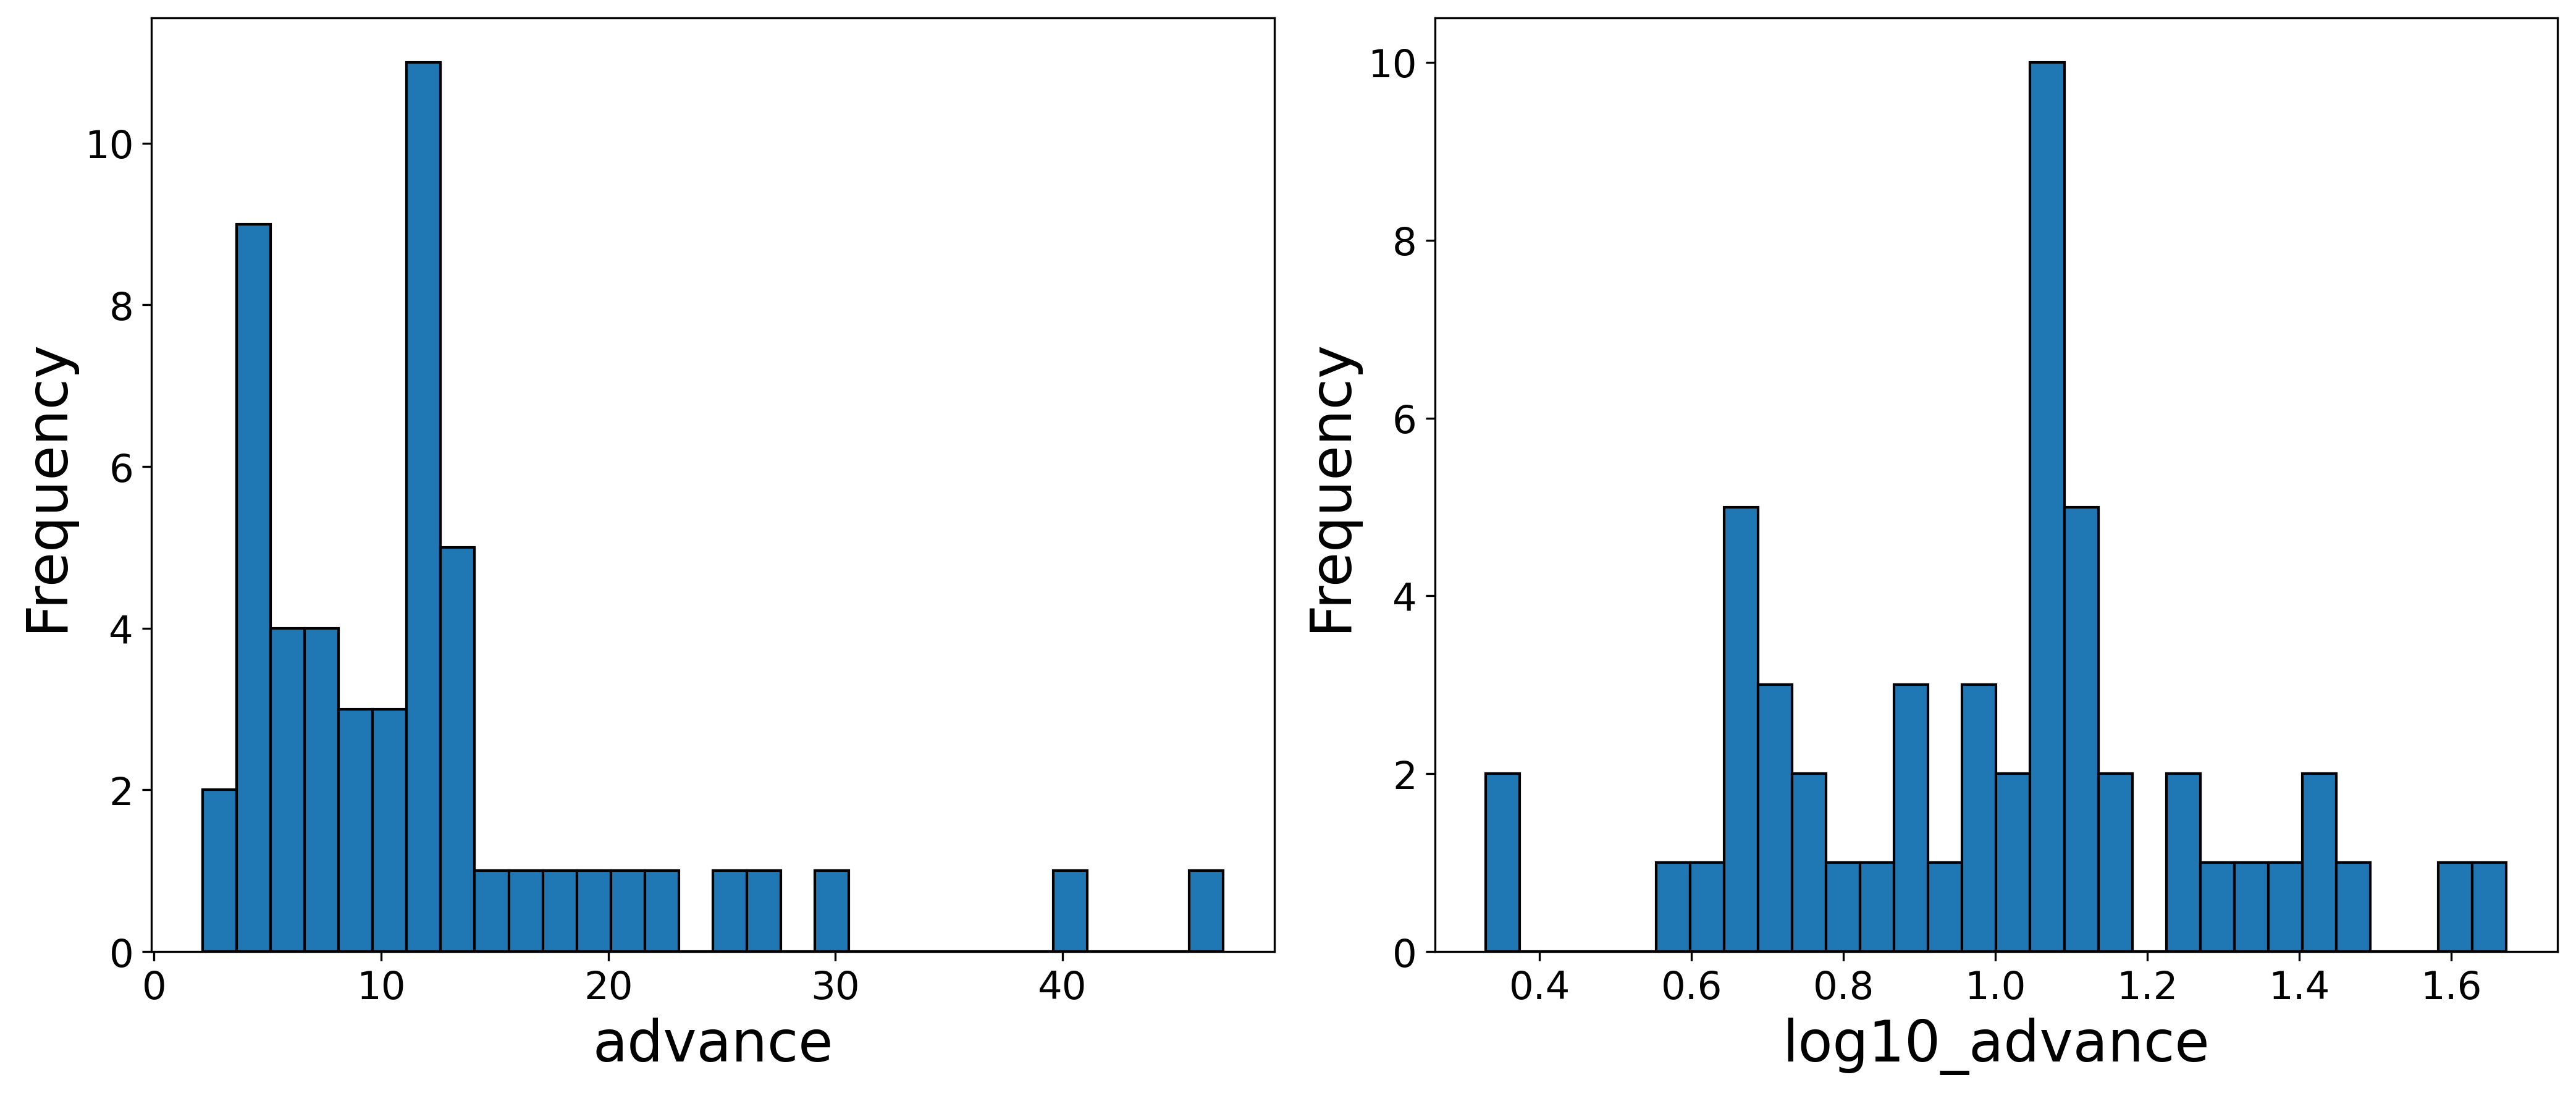

In [ ]:

df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/1230.csv')
column1 = df['percent']
column1_log10 = np.log10(np.array(column1))
fig2, ax = plt.subplots(1,2,figsize=(14, 6), dpi=300)
ax[0].hist(column1, bins=30, edgecolor='black')
ax[0].set_xlabel('advance', fontsize=22)
ax[0].set_ylabel('Frequency', fontsize=22)
# ax[0].set_title('histogram of labels')
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)
ax[1].hist(column1_log10, bins=30, edgecolor='black')
ax[1].set_xlabel('log10_advance', fontsize=22)
ax[1].set_ylabel('Frequency', fontsize=22)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)
fig2.tight_layout()
plt.show()

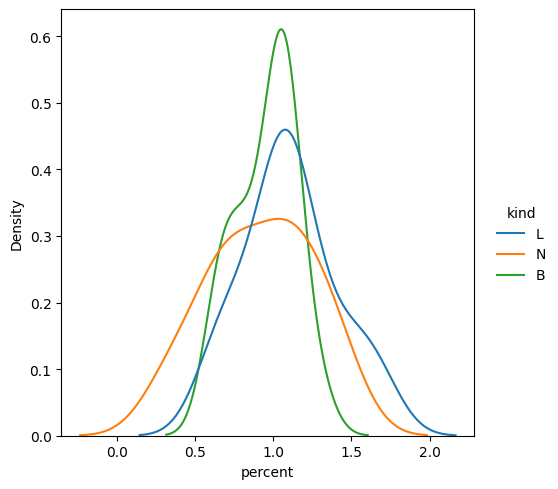

In [ ]:
types = df['kind'].isin(['N','B','L'])
sns.displot(pd.DataFrame({'percent':np.log10(df[types]['percent']),
                          'kind':df[types]['kind']}),
           x='percent', hue='kind',kind='kde')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.show()

In [ ]:
sns.boxplot(x='kind', y='percent', data=df[types], fliersize=0)

<ipython-input-71-c495fb14ec96>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['T'], y=df['percent'], ax=axes_flat[0], palette=palette)
<ipython-input-71-c495fb14ec96>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['C'], y=df['percent'], ax=axes_flat[1], palette=palette)
<ipython-input-71-c495fb14ec96>:11: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=df['C'], y=df['percent'], ax=axes_flat[1], palette=palette)
<ipython-input-71-c495fb14ec96>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue

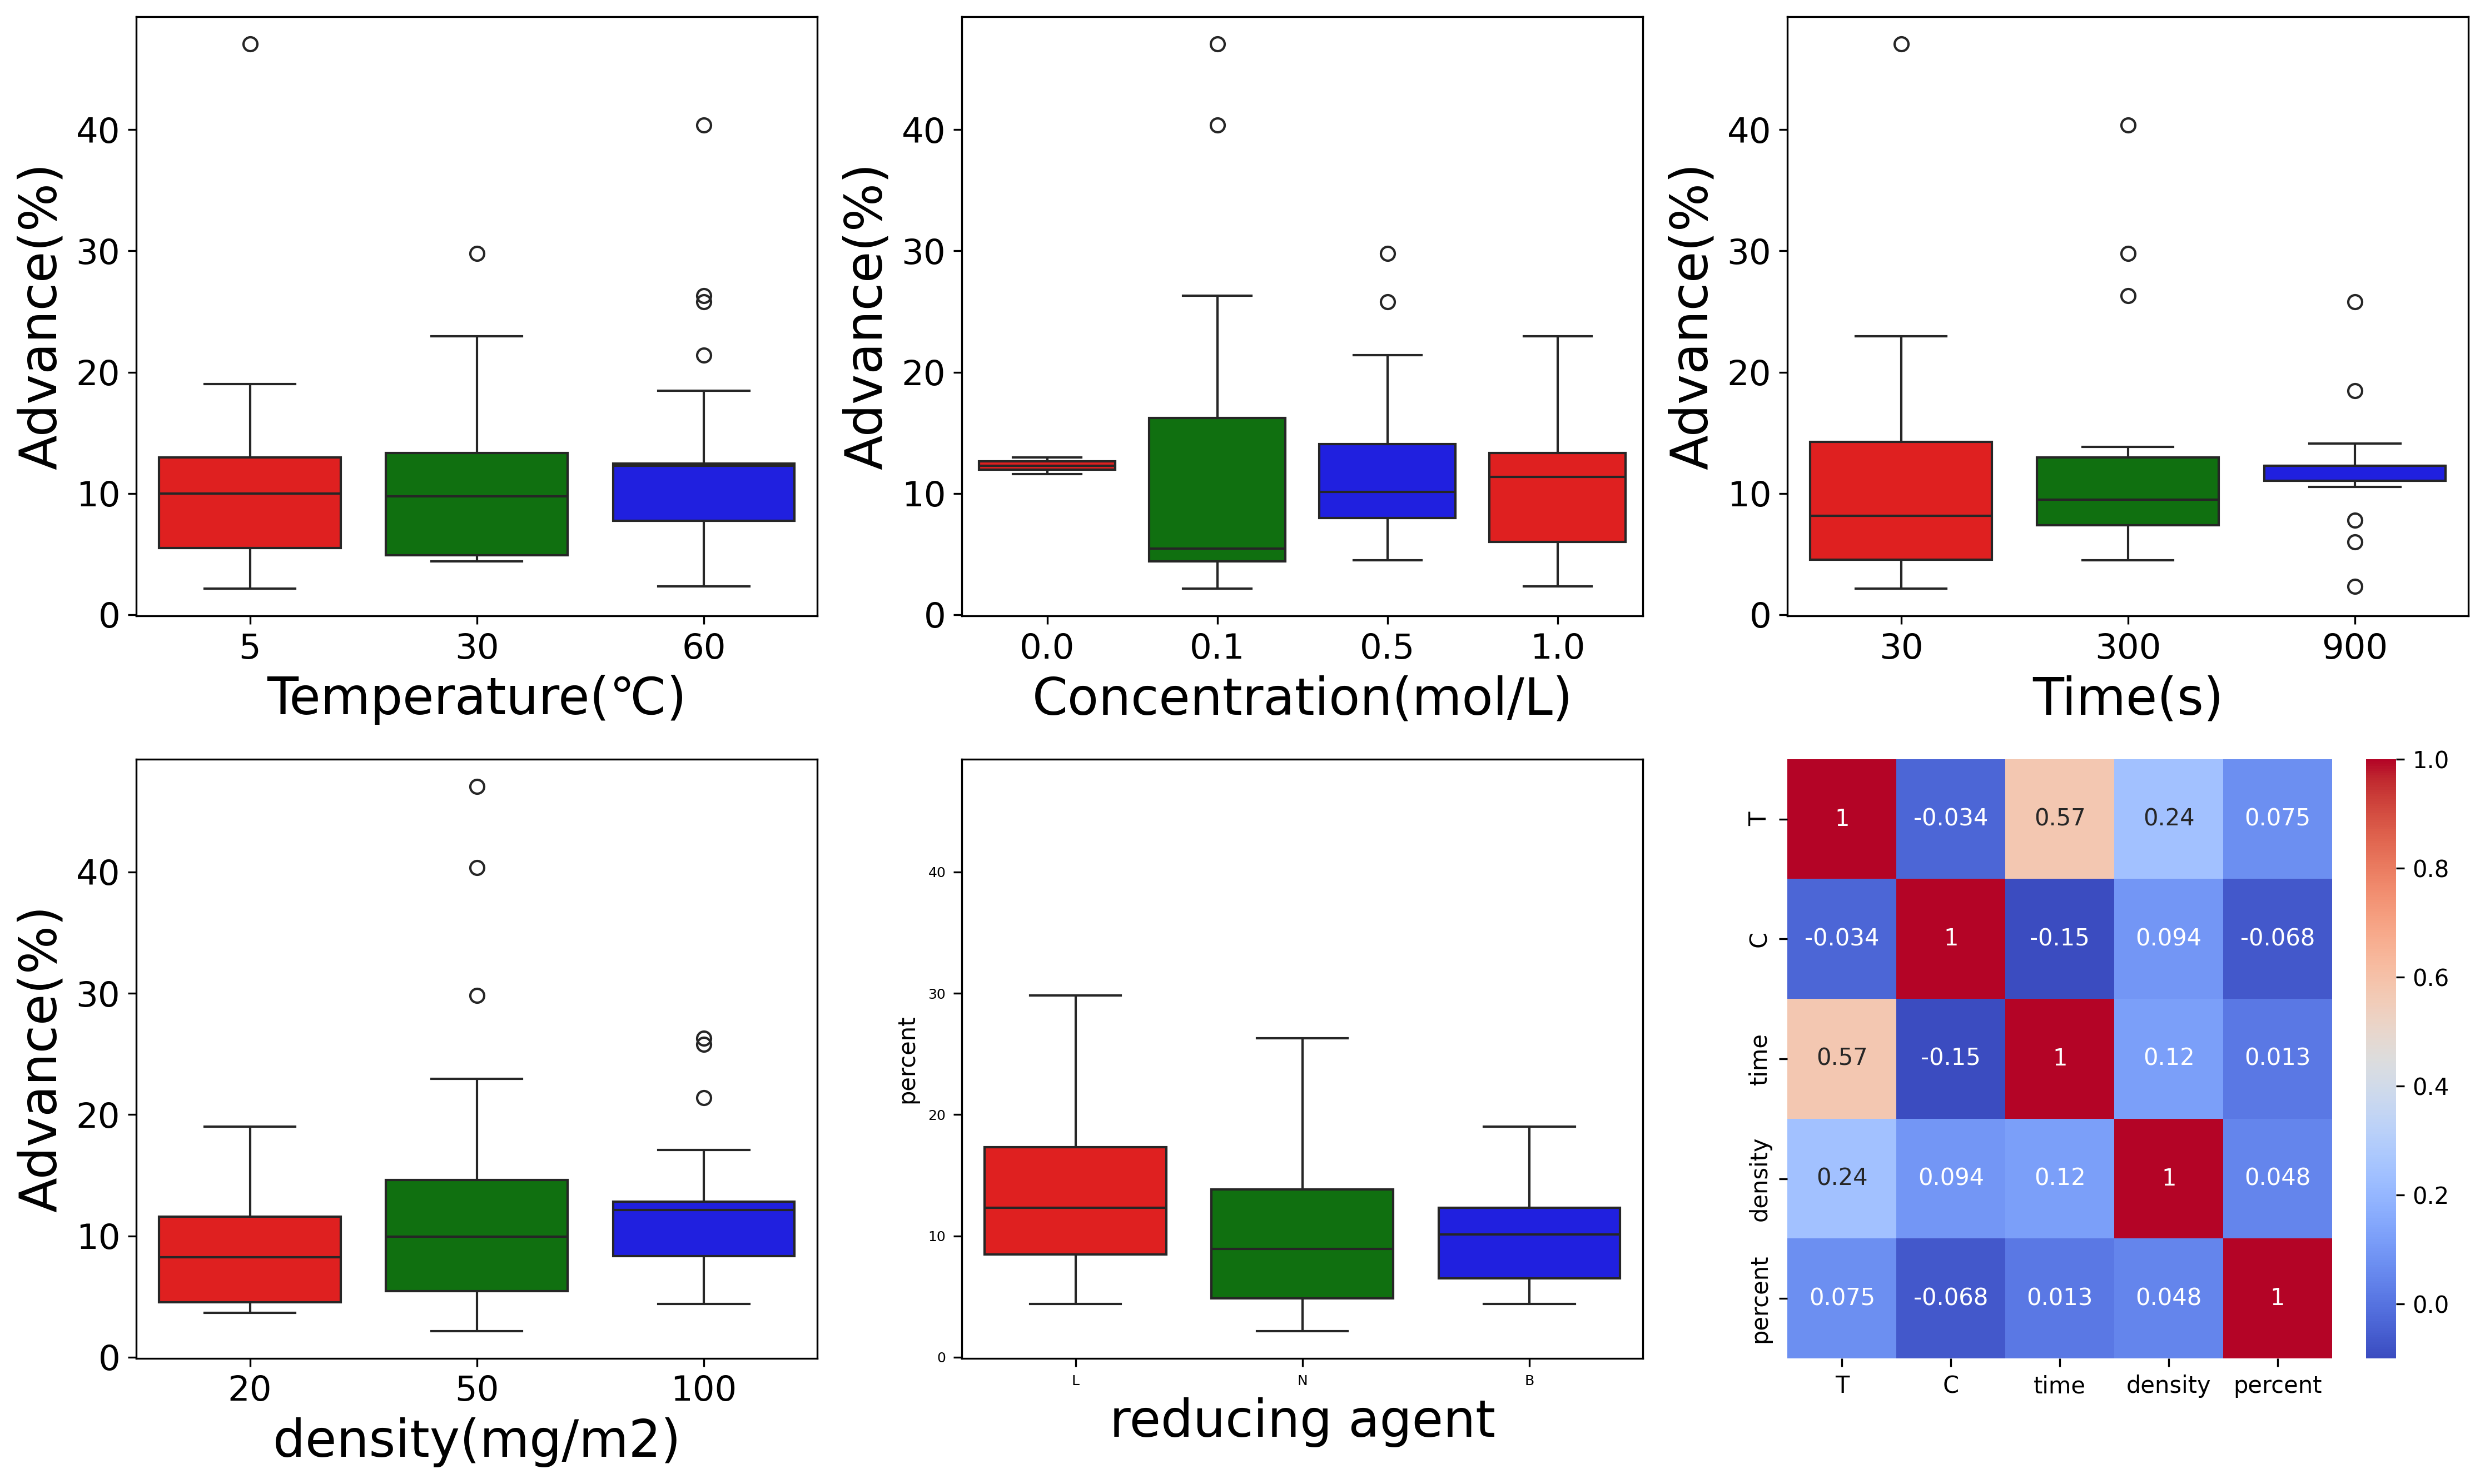

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 9), dpi=300)
axes_flat = axes.flatten()
colors = ['red', 'green', 'blue']
palette = sns.color_palette(colors)
sns.boxplot(x=df['T'], y=df['percent'], ax=axes_flat[0], palette=palette)
sns.boxplot(x=df['C'], y=df['percent'], ax=axes_flat[1], palette=palette)
sns.boxplot(x=df['time'], y=df['percent'], ax=axes_flat[2], palette=palette)
sns.boxplot(x=df['density'], y=df['percent'], ax=axes_flat[3], palette=palette)
sns.boxplot(x='kind', y='percent', data=df[types], fliersize=0,ax=axes_flat[4], palette=palette)
col=['T','C','time','density','percent']
sns.heatmap(df[col].corr(),annot=True,cmap='coolwarm', vmin=-0.1, vmax=1, ax=axes_flat[5])
plt.setp(axes_flat[4].get_xticklabels(), fontsize=6)
plt.setp(axes_flat[4].get_yticklabels(), fontsize=6)
axes_flat[0].set_xlabel('Temperature(℃)', fontsize=22)
axes_flat[1].set_xlabel('Concentration(mol/L)', fontsize=22)
axes_flat[2].set_xlabel('Time(s)', fontsize=22)
axes_flat[3].set_xlabel('density(mg/m2)', fontsize=22)
axes_flat[4].set_xlabel('reducing agent', fontsize=22)
for i in range(4):
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), fontsize=15)
  axes_flat[i].set_yticklabels(axes_flat[i].get_yticklabels(), fontsize=15)
  axes_flat[i].set_ylabel('Advance(%)', fontsize=22)
  pass
plt.tight_layout()
plt.show()

## 3.2 prediction

In [ ]:

concentration = np.linspace(0.1,1,50)
temperatures=np.linspace(5,60,100)
time=np.linspace(30,900,200)
density = [100,50,20]
kind=['C_Sodium citrate','B_l-ascorbic acid','A_Sodium borohydride']
temperatures=temperatures.tolist()
concentration=concentration.tolist()
time=time.tolist()
list_all=[]
for i in density:
    for j in kind:
        for k in temperatures:
            for a in concentration:
                for b in time:
                    lista=[i,j,k,a,b]
                    list_all.append(lista)

df = pd.DataFrame(list_all)
df.to_csv(r'fea_all6.csv', index=False)

In [ ]:
path = r'fea_all6.csv'
name = 'npy'
data = pd.read_csv(path)
columns_to_encode = ['kind']
features = pd.get_dummies(data, dummy_na=False, columns=columns_to_encode)
features = features.assign(E=0, D=0)
features = features.values
np.save('fea_all6.npy',features)

In [ ]:
know_fea = np.load(r'fea_all6.npy', allow_pickle=True)
scaler = MinMaxScaler()
know_fea = scaler.fit_transform(know_fea)
know_fea = xgb.DMatrix(know_fea)
model = xgb.Booster()
model.load_model(r'xgboost_model.json')
know_fea_pred = model.predict(know_fea)

In [ ]:
know_fea_pred = np.power(10, know_fea_pred)
df4 = pd.DataFrame(know_fea_pred, columns=['know_percent'])
df5 = pd.read_csv(path)
df6 = pd.concat([df5, df4], axis=1)
df6.to_csv(r'all6.csv', index=True)

## 3.3 load model 

训练
RMSE: 0.0513601803913089
MAE: 0.04121119014797901
R²: 0.9810389263747266
测试
RMSE: 0.12214186426586562
MAE: 0.10116662794536375
R²: 0.8191915406151281


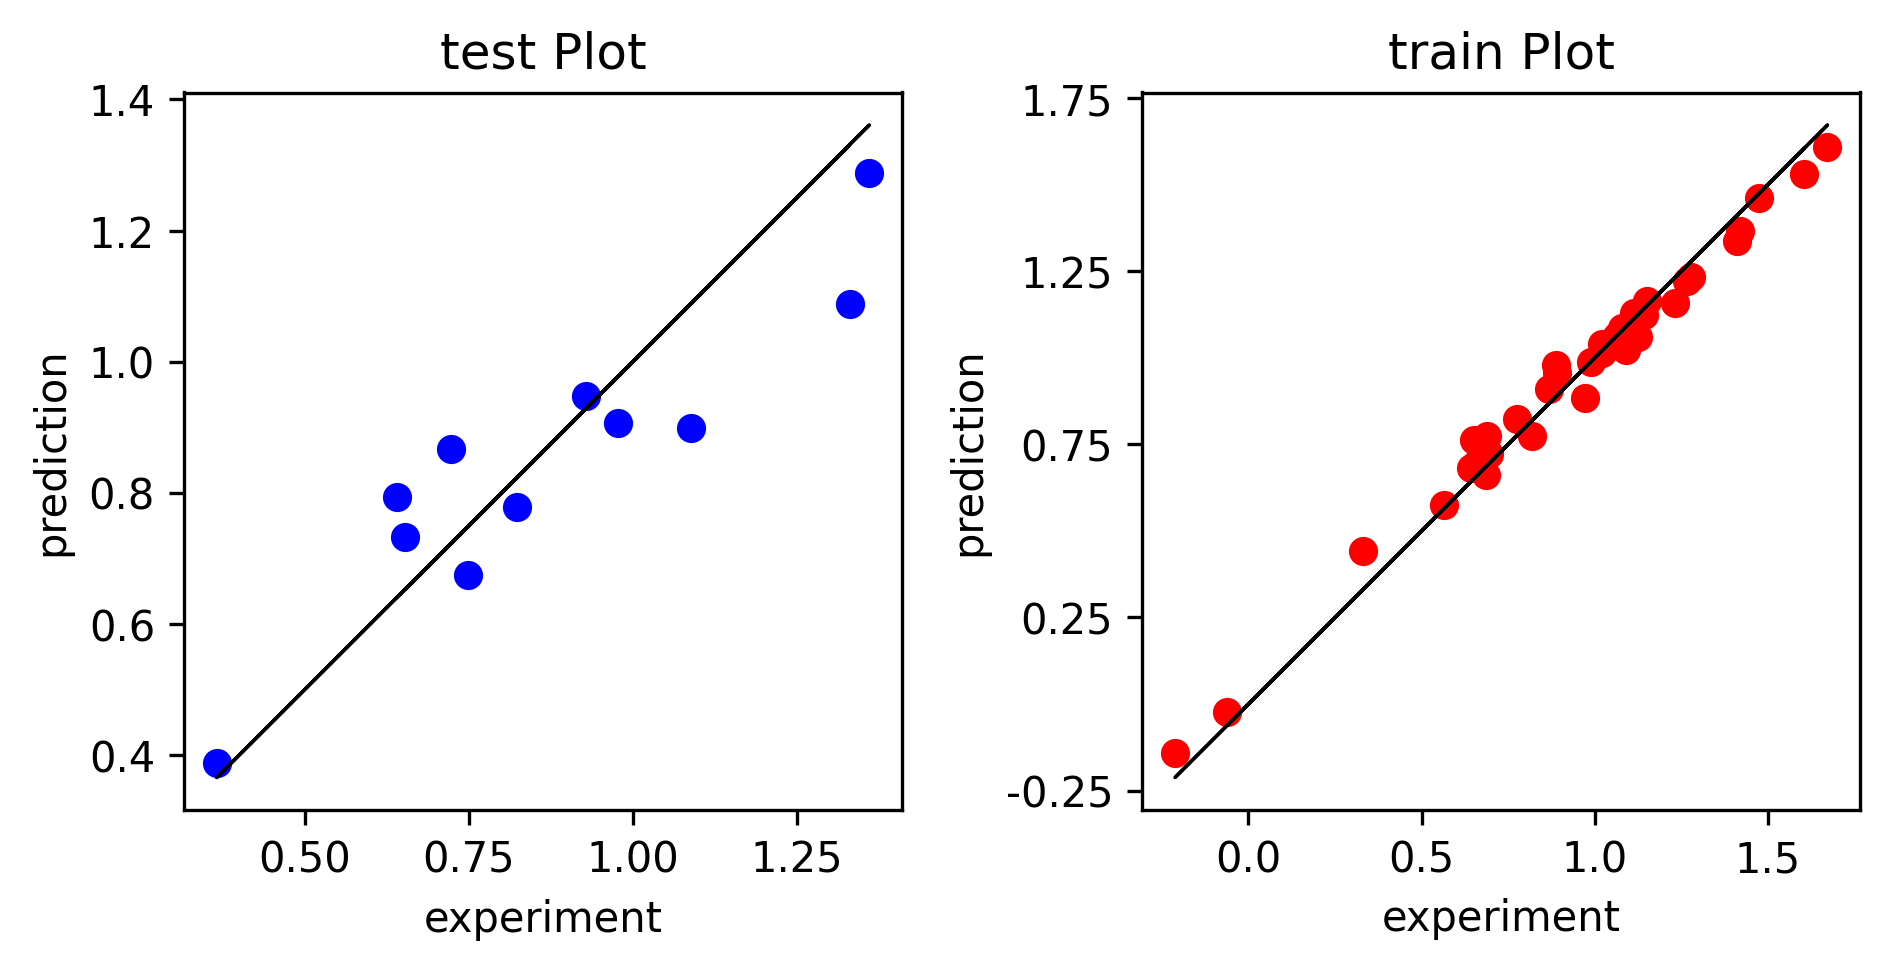

In [6]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
def best_model():
  model = xgb.Booster()
  model.load_model(r'/content/drive/MyDrive/Colab Notebooks/xgboost_model.json')
  y_pred_test = model.predict(dtest)
  y_pred_train = model.predict(dtrain)
  y_pred_train = y_pred_train.reshape((len(y_pred_train),1))
  y_pred_test = y_pred_test.reshape((len(y_pred_test),1))
  print('训练')
  rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
  print('RMSE:', rmse)
  mae = mean_absolute_error(y_train, y_pred_train)
  print('MAE:', mae)
  r2 = r2_score(y_train, y_pred_train)
  print('R²:', r2)
  print('测试')
  rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
  print('RMSE:', rmse)
  mae = mean_absolute_error(y_test, y_pred_test)
  print('MAE:', mae)
  r2 = r2_score(y_test, y_pred_test)
  print('R²:', r2)
  fig, axs = plt.subplots(1,2,dpi=300)
  axs[0].plot(y_test,y_test, color='black', linewidth=0.8)
  axs[0].scatter(y_test, y_pred_test, color='blue')
  axs[0].set_title("test Plot")
  axs[0].set_xlabel("experiment")
  axs[0].set_ylabel("prediction")
  axs[1].plot(y_train,y_train, color='black', linewidth=0.8)
  axs[1].scatter(y_train,y_pred_train, color='red')
  axs[1].set_yticks([-0.25, 0.25, 0.75,1.25, 1.75])
  axs[1].set_yticklabels(['-0.25', '0.25', '0.75', '1.25', '1.75'])
  axs[1].set_title("train Plot")
  axs[1].set_xlabel("experiment")
  axs[1].set_ylabel("prediction")
  axs[0].grid(False)
  axs[1].grid(False)
  axs[0].set_aspect(1)
  axs[1].set_aspect(1)
  plt.tight_layout()
  plt.show()
best_model()